#**Least-Squares Problem Project** 




สมาชิก

*   ธัญชนก เลิศเสถียรชัย 6424650049
*   นายทัศน์พล แต้มช่วย 6424650056
*   นัญนภัษรน์ ชูโชติธนะสิทธิ์ 6424650098
*   พรกมล บุษบากรกุล 6424650130
*   วรดนัย วงษ์มณี 6424650189




##1.ลักษณะของกลุ่มข้อมูล ( Data Description )

ชุดข้อมูลประกอบด้วยสถิติเกี่ยวกับการขายผลิตภัณฑ์ในร้านค้าต่างๆ 200 แห่ง และข้อมูลการใช้งบในการโฆษณาด้วยสื่อต่างๆโดยData set ที่เลือกมามีลักษณะดังนี้

* ไม่มี missing values
* จำนวน Instance: 200
* จำนวน Attribute: 5 ดังนี้

        1. Unnamed: 0 (collumn แสดงลำดับของข้อมูล)
        2. TV (หน่วยเป็น $1,000)
        3. Radio (หน่วยเป็น $1,000)
        4. Newspaper (หน่วยเป็น $1,000)
        5. Sales (หน่วยเป็น1,000ชิ้น)

กลุ่มของพวกเราได้นำตัวแปร 4 ตัวมาใช้ในการคาดการณ์ยอดขาย ดังนี้
        
        1. TV (หน่วยเป็น $1,000)
        2. Radio (หน่วยเป็น $1,000)
        3. Newspaper (หน่วยเป็น $1,000)
        4. Sales (หน่วยเป็น1,000ชิ้น)




## 2.Experiment

### import module ที่จำเป็นต้องใช้ในการวิเคราะห์และทำนายข้อมูล

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from math import sqrt
from matplotlib.pyplot import plot
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import data ไว้ในตัวแปร df ให้สามารถนำไปใช้ต่อได้

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/born2611/DSI205_PROJECT/main/Advertising.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


drop columnที่ไม่ได้ใช้ทิ้ง

In [4]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [5]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


ตรวจหาMissing Value ในแต่ละ Columnเพื่อถ้าเจอจะได้สามารถแทนค่าหรือลบข้อมูลนั้นออกไป

In [7]:
print(df.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


จากdf.describeพบว่ามีข้อมูลที่มีค่าเป็น 0 จึงต้องหาและแยกออกเพื่อป้องกันไม่ให้โมเดลคลาดเคลื่อน

In [8]:
df[df.Radio <= 0]

,TV,Radio,Newspaper,Sales
127,80.2,0.0,9.2,8.8


ให้ df1 เป็นตัวแปรที่ drop ข้อมูลที่น้อยกว่าหรือเท่ากับ 0 ออกแล้ว

In [9]:
df1=df.drop([127])
df1

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


ใช้ boxplot เพื่อดูว่าข้อมูลมี Outlier หรือไม่ถ้ามีต้องนำออกเพื่อป้องกันการคลาดเคลื่อนของโมเดล


Text(0.5, 1.0, 'Outlier Detection based on TV')

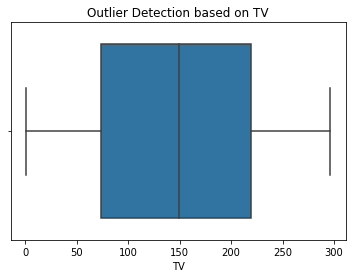

In [10]:
sns.boxplot(x=df1['TV']);
plt.rcParams["figure.figsize"] = (10,6) 
plt.title('Outlier Detection based on TV')

Text(0.5, 1.0, 'Outlier Detection based on Radio')

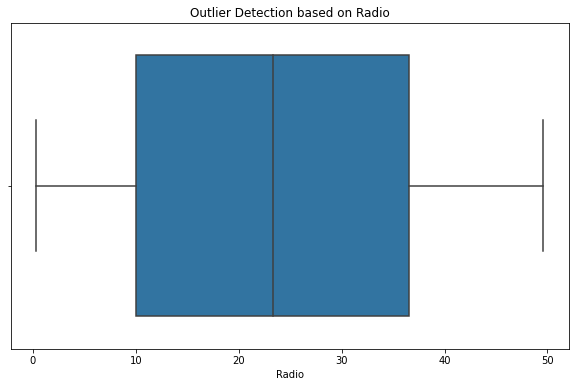

In [11]:
sns.boxplot(x=df1['Radio']);
plt.rcParams["figure.figsize"] = (10,6) 
plt.title('Outlier Detection based on Radio')

Text(0.5, 1.0, 'Outlier Detection based on Newspaper')

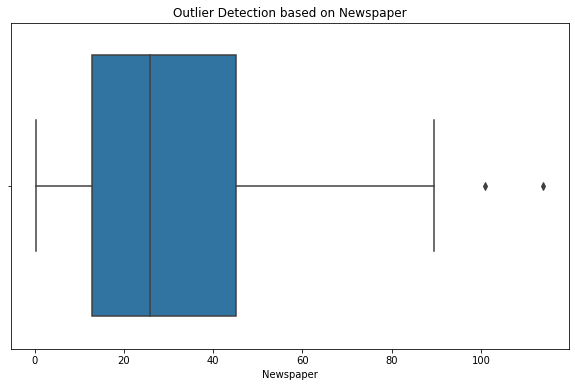

In [12]:
sns.boxplot(x=df1['Newspaper']);
plt.rcParams["figure.figsize"] = (20,12) 
plt.title('Outlier Detection based on Newspaper')

พบว่าข้อมูล Newspaper มี Outlier จึงสร้าง Function หาตำแหน่งของ Outlier ขึ้นมา

In [13]:
def outlier_detection(dataframe):
    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)
    IQR = Q3 - Q1
    upper_end = Q3 + 1.5 * IQR
    lower_end = Q1 - 1.5 * IQR 
    outlier = dataframe[(dataframe > upper_end) | (dataframe < lower_end)]
    return outlier

In [14]:
outlier_detection(df1['TV'])

Series([], Name: TV, dtype: float64)

In [15]:
outlier_detection(df1['Radio'])

Series([], Name: Radio, dtype: float64)

In [16]:
outlier_detection(df1['Newspaper'])

16     114.0
101    100.9
Name: Newspaper, dtype: float64

ให้ข้อมูลที่ drop Outlier แล้วเป็น df2

In [17]:
df2=df1.drop([16, 101])
df2

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [18]:
df2.describe()

,TV,Radio,Newspaper,Sales
count,197.000000,197.000000,197.000000,197.000000
mean,147.025888,23.248223,29.881726,14.007107
std,85.528490,14.807622,20.445365,5.196108
min,0.700000,0.300000,0.300000,1.600000
25%,74.700000,10.000000,12.800000,10.400000
50%,149.800000,22.500000,25.600000,12.900000
75%,218.500000,36.500000,44.300000,17.400000
max,293.600000,49.600000,89.400000,27.000000


plot Heatmap เพื่อดูความสัมพันธ์กันของข้อมูล และในส่วนนี้ทำให้ได้รู้ว่าค่า correlation ระหว่างตัวแปร Newspaper และ Sales มีค่าน้อยมาก

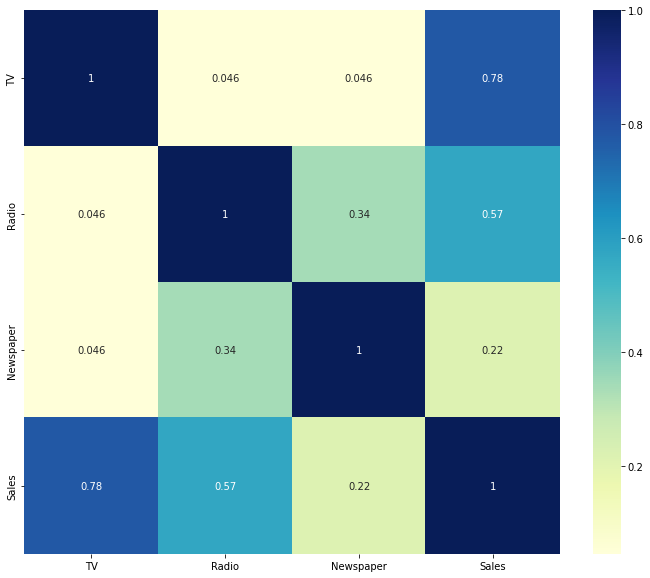

In [19]:
plt.figure(figsize=(12,10))
sns.heatmap(df2.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [20]:
df2.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.046156,0.045966,0.778339
Radio,0.046156,1.000000,0.341367,0.573835
Newspaper,0.045966,0.341367,1.000000,0.215539
Sales,0.778339,0.573835,0.215539,1.000000


Pairplot สำหรับดูแนวโน้มของข้อมูลแต่ละตัวแปร

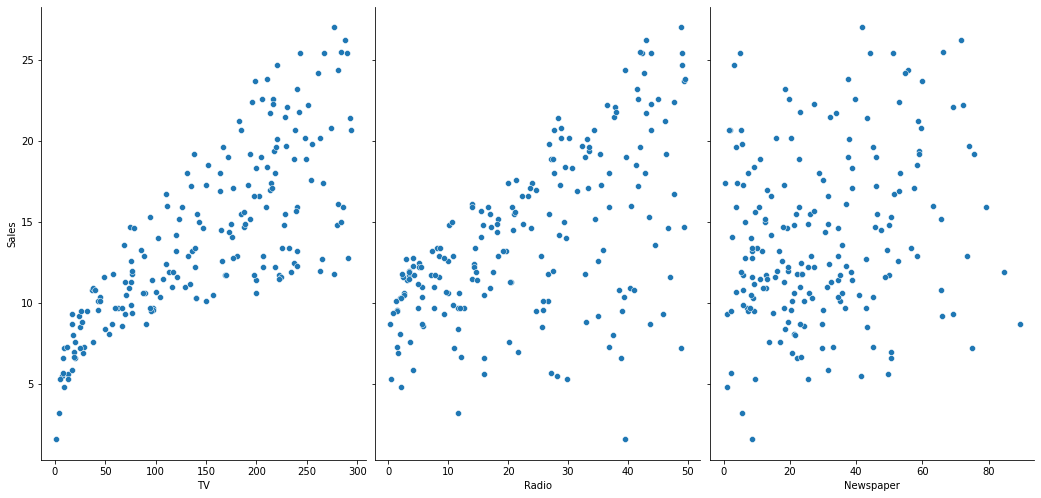

In [21]:
sns.pairplot(df2, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7)

## ทดลองใช้โมเดลต่างๆ

เริ่มจากการกำหนดตัวแปรต้นและตัวแปรตาม

โดยกำหนดให้ TV, Radio เป็นตัวแปรต้น(X) และเลือกที่จะไม่ใช้ตัวแปร Newspaper เพราะมีค่า correlation ที่ต่ำ

In [22]:
X = df2.iloc[:,[0,1]] #ถ้าจะใช้ Newspaper ก็เพิ่มเลข 2 เข้าไป
X

,TV,Radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8
...,...,...
195,38.2,3.7
196,94.2,4.9
197,177.0,9.3
198,283.6,42.0


และ Sales เป็นตัวแปรตาม(y)

In [23]:
y=df2['Sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 197, dtype: float64

# Linear regression

แบ่งข้อมูลเป็น2ส่วนคือ

*   training set 75%
*   test set 25%



In [24]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state = 55) #splitข้อมูล
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_test dimension= ', y_test.shape)

X_train dimension=  (147, 2)
X_test dimension=  (50, 2)
y_train dimension=  (147,)
y_test dimension=  (50,)


สร้างแบบจำลองข้อมูลขึ้นมาโดยใช้ Linear Regression และนำข้อมูลมาใช้กับโมเดลโดย fit ข้อมูลกับ X_train และ y_train

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

หาค่า intercept และ coefficients เพื่อนำมาใช้สร้างสมการเส้นตรง

In [26]:
print('coef= ', model.coef_) 
print('intercept= ', model.intercept_)

coef=  [0.04729428 0.18877229]
intercept=  2.6513418712386017


จาก yˆ= a+bx ทำให้ได้สมการเส้นตรงออกมาดังนี้

In [27]:
print('y = ' + str('%.3f' % model.intercept_) + ' + ' + str('%.3f' % model.coef_[0]) + 'x₁ ' + ' + '
   + str('%.3f' % model.coef_[1]) + 'x₂')

y = 2.651 + 0.047x₁  + 0.189x₂


เปรียบเทียบยอดขายจริงกับยอดขายที่ทำนายได้ ซึ่งสามารถใช้กราฟและตารางอธิบายได้ ดังนี้


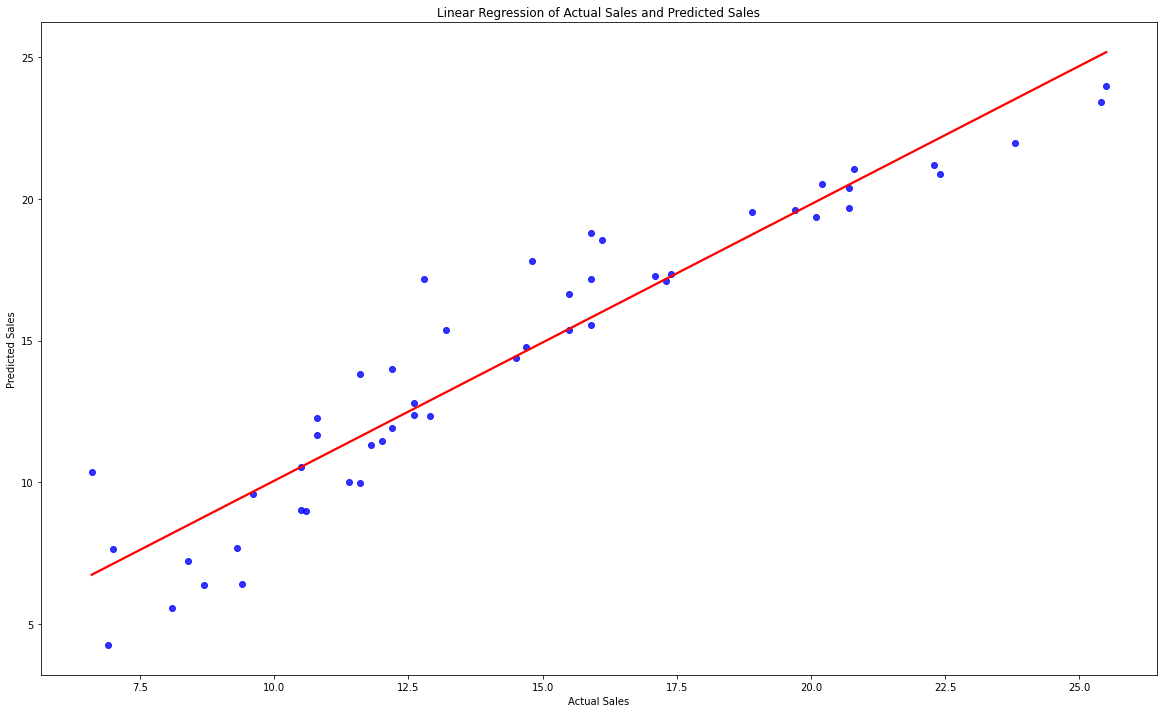

In [28]:
plt.figure()
sns.regplot( y_test , model.predict(X_test) , ci=None ,line_kws={"color":"red"},scatter_kws={"color":"blue"})
plt.rcParams["figure.figsize"] = (10,6)
plt.title('Linear Regression of Actual Sales and Predicted Sales',)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

ตารางเปรียบเทียบค่าที่ทำนายได้และค่าที่ขายได้จริง


In [29]:
predictedSales = pd.DataFrame(model.predict(X_test), columns=['Predicted Sales'])
actualSales = pd.DataFrame(y_test)
actualSales = actualSales.reset_index(drop=True)
df_actual_vs_predicted = pd.concat([actualSales,predictedSales],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Sales,11.800000,15.90000,20.800000,17.300000,10.600000,10.800000,13.200000,15.500000,15.90000,20.20000,...,20.700000,10.500000,9.400000,14.800000,17.400000,14.500000,15.500000,17.100000,10.500000,8.10000
Predicted Sales,11.304845,15.56193,21.051305,17.107043,9.002916,12.278007,15.384735,16.638877,18.80144,20.51219,...,20.391728,10.548434,6.415642,17.809798,17.335958,14.376591,15.360272,17.293555,9.010674,5.55913


ทำการหาค่า R Square, MAE, RMSE เพื่อตรวจสอบความคลาดเคลื่อนของโมเดล

In [30]:
y_pred = model.predict(X_test)
R2_lr = float(r2_score(y_pred, y_test)*100)
MAE_lr = float(mean_absolute_error(y_pred, y_test))
RMSE_lr = float(sqrt(mean_squared_error(y_pred, y_test)))
R2_lr = "{:.2f}".format(R2_lr)
MAE_lr = "{:.4f}".format(MAE_lr)
RMSE_lr = "{:.4f}".format(RMSE_lr)

print('R²= ',R2_lr,'%')
print('MAE =',MAE_lr)
print('RMSE =',RMSE_lr)

R²=  89.63 %
MAE = 1.2469
RMSE = 1.6355


# Random Forest Regression

แบ่งข้อมูลเป็น2ส่วนคือ

*   training set 75%
*   test set 25%

In [33]:
X_train2,X_test2, y_train2, y_test2 = train_test_split(X, y, test_size =0.25, random_state = 55)
print('X_train dimension= ', X_train2.shape)
print('X_test dimension= ', X_test2.shape)
print('y_train dimension= ', y_train2.shape)
print('y_test dimension= ', y_test2.shape)

X_train dimension=  (147, 2)
X_test dimension=  (50, 2)
y_train dimension=  (147,)
y_test dimension=  (50,)


สร้างแบบจำลองข้อมูลขึ้นมาโดยใช้ Random Forest Regression และนำข้อมูลมาใช้กับโมเดลโดย fit ข้อมูลกับ X_train2 และ y_train2

In [34]:
from sklearn.ensemble import RandomForestRegressor
reg_df2 = RandomForestRegressor(n_estimators=1000, n_jobs=-1,random_state=55)
reg_df2.fit(X_train2,y_train2)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=55)

เปรียบเทียบยอดขายจริงกับยอดขายที่ทำนายได้ ซึ่งสามารถใช้กราฟและตารางอธิบายได้ ดังนี้



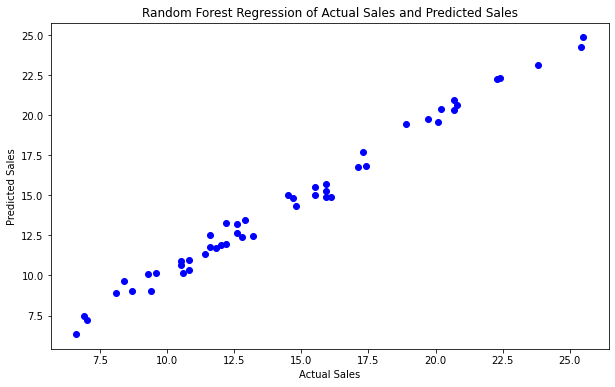

In [35]:
y_pred2 = reg_df2.predict(X_test2)
plt.figure()
plt.scatter( y_test2 , y_pred2, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.title('Random Forest Regression of Actual Sales and Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

In [36]:
y_pred2 = pd.DataFrame(y_pred2, columns=['Estimated RF Sales'])
y_test2 = pd.DataFrame(y_test2)
y_test2 = y_test2.reset_index(drop=True)
RF = pd.concat([y_test2,y_pred2], axis=1)
RF.T


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Sales,11.8000,15.9000,20.8000,17.3000,10.6000,10.8000,13.2000,15.5000,15.9000,20.2000,...,20.7000,10.5000,9.4000,14.8000,17.4000,14.5000,15.5000,17.1000,10.5000,8.1000
Estimated RF Sales,11.7331,15.7048,20.6107,17.7171,10.1861,10.9714,12.4882,15.0238,14.8659,20.3842,...,20.3296,10.6812,9.0106,14.3398,16.8318,15.0113,15.5135,16.7891,10.9329,8.9022


ทำการหาค่า R Square, MAE, RMSE เพื่อตรวจสอบความคลาดเคลื่อนของโมเดล

In [37]:
test_pred = reg_df2.predict(X_test2)
R2_rf = float(r2_score(y_test2 ,test_pred)*100)
MAE_rf = float(mean_absolute_error(y_test2 ,test_pred))
RMSE_rf = float(sqrt(mean_squared_error(y_test2, test_pred)))
R2_rf = "{:.2f}".format(R2_rf)
MAE_rf = "{:.4f}".format(MAE_rf)
RMSE_rf = "{:.4f}".format(RMSE_rf)
print('R² = ',R2_rf,"%")
print('MAE =',MAE_rf)
print('RMSE =',RMSE_rf)

R² =  98.74 %
MAE = 0.4504
RMSE = 0.5539


# 3.Result

### Linear Regression

กราฟแสดงความสัมพันธ์ระหว่างยอดขายจริงและยอดขายที่ทำนายได้ทำให้รู้ว่าทั้งสองค่ามีการแปรผันตรงกัน

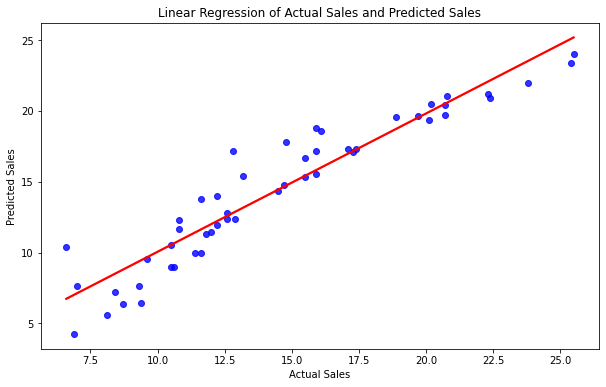

In [32]:
plt.figure()
sns.regplot( y_test , model.predict(X_test) , ci=None ,line_kws={"color":"red"},scatter_kws={"color":"blue"})
plt.rcParams["figure.figsize"] = (10,6)
plt.title('Linear Regression of Actual Sales and Predicted Sales',)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

ค่า R Square, MAE, RMSE ของ Linear Regression



In [38]:
print('R²= ',R2_lr,'%')
print('MAE =',MAE_lr)
print('RMSE =',RMSE_lr)

R²=  89.63 %
MAE = 1.2469
RMSE = 1.6355


### Random Forest Regression

กราฟแสดงความสัมพันธ์ระหว่างยอดขายจริงและยอดขายที่ทำนายได้ทำให้รู้ว่าทั้งสองค่ามีการแปรผันตรงกัน

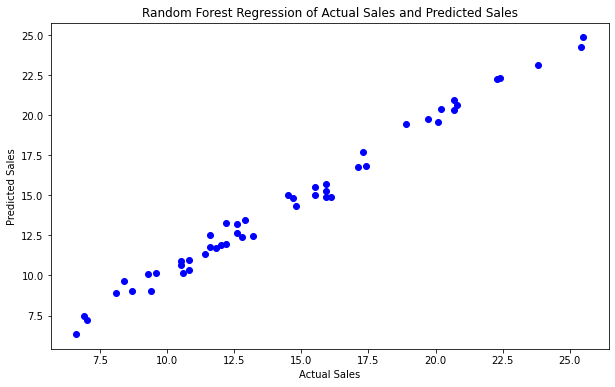

In [39]:
y_pred2 = reg_df2.predict(X_test2)
plt.figure()
plt.scatter( y_test2 , y_pred2, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.title('Random Forest Regression of Actual Sales and Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

ค่า R Square, MAE, RMSE ของ Random Forest Regression

In [40]:
print('R² = ',R2_rf,"%")
print('MAE =',MAE_rf)
print('RMSE =',RMSE_rf)

R² =  98.74 %
MAE = 0.4504
RMSE = 0.5539


ตารางแสดงยอดขายจริง เทียบกับยอดขายที่ทำนายได้ระหว่าง Linear Regression และ Random Forest Regression 

In [41]:
pred_Lr = pd.DataFrame(predictedSales)
pred_Rr = pd.DataFrame(y_pred2)
Weight = pd.DataFrame(y_test2)
pred_Lr.columns = ["Predict Linear Regression"]
pred_Rr.columns = ["Predict Random Forest"]
Weight.columns = ["Actual Sales"]
table5 = pd.concat([Weight,pred_Lr,pred_Rr], axis=1)
table5 = table5.sort_values(by=['Actual Sales'])
table5 = table5.reset_index(drop=True)
table5

,Actual Sales,Predict Linear Regression,Predict Random Forest
0,6.6,10.363479,6.3521
1,6.9,4.253970,7.5003
2,7.0,7.636833,7.2532
3,8.1,5.559130,8.9022
4,8.4,7.205814,9.6433
5,8.7,6.385282,9.0404
6,9.3,7.670229,10.0839
7,9.4,6.415642,9.0106
8,9.6,9.574198,10.1592
9,10.5,10.548434,10.6812


# 4.Conclusion


ตารางเปรียบทียบประสิทธิภาพและค่าความคลาดเคลื่อนของ Linear Regression และ Random Forest Regression

In [ ]:
Table_compare = pd.DataFrame({'Linear Regression': [R2_lr, MAE_lr, RMSE_lr],
                   'Random Forest Regression': [R2_rf, MAE_rf, RMSE_rf],},
                  index=['R²', 'MAE', 'RMSE'])
Table_compare

,Linear Regression,Random Forest Regression
R²,89.63,98.74
MAE,1.2469,0.4504
RMSE,1.6355,0.5539


เมื่อนำปัจจัยเหล่านี้มาทำนายยอดขายด้วย Linear Regression จากการศึกษาพบว่าปัจจัยต่างๆที่นำมาทำนายยอดขาย ได้แก่ TV, Radio มีความสัมพันธ์กับยอดขายแบบแปรผันตรงกันและผลลัพท์ที่ทำนายได้มีค่าใกล้เคียงกับผลลัพท์จริง และจากการตรวจสอบประสิทธิภาพพบว่าโมเดล Linear Regression มีความแม่นยำสูงถึง 89.63% สังเกตได้จากค่า R² และค่าRMSEมีค่า1.6525นั่นหมายความว่ายอดขายที่ทำนายได้จะมีค่าคลาดเคลื่อนประมาณ 1,635.5 ชิ้น

และถ้าเปลี่ยนไปทำนายยอดขายด้วย Random Forest Regression จากการศึกษาพบว่าปัจจัยต่างๆที่นำมาทำนายยอดขาย ได้แก่ TV, Radio มีความสัมพันธ์กับยอดขายแบบแปรผันตรงกันและผลลัพท์ที่ทำนายได้มีค่าใกล้เคียงกับผลลัพท์จริง และจากการตรวจสอบประสิทธิภาพพบว่าโมเดล Random Forest Regression มีความแม่นยำสูงถึง 98.74% สังเกตได้จากค่า R² และค่าRMSEมีค่า0.5539 นั่นหมายความว่ายอดขายที่ทำนายได้จะมีค่าคลาดเคลื่อนประมาณ 0.5539พันชิ้นหรือประมาณ 553.9ชิ้น

จากการศึกษาและนำโมเดลทั้งสองมาทำนายยอดขาย ทำให้สรุปได้ว่าโมเดลที่ใช้วิธี Random Forest Regression มีความแม่นยำในการทำนายผลมากกว่าโมเดลที่ใช้วิธี Linear Regression ซึ่งสังเกตได้จากค่าความคลาดเคลื่อนของโมเดลที่มีค่าน้อยกว่าและค่า R² ที่สูงกว่า แต่ทั้งนี้ก็ยังต้องระวังการเกิด Overfitting ของ Random Forest Regression ด้วย


## Reference

Ashish. (2019). Advertising. Available from:https://www.kaggle.com/datasets/ashydv/advertising-dataset . [accessed 17 April 2022].